# Auto MPG — Data Cleaning & Feature Engineering

This notebook performs:
- Data loading
- Missing value treatment
- Data type fixes
- Outlier detection
- Feature engineering
- Scaling
- Saving a cleaned dataset for modeling

Output file:
`auto_mpg_cleaned.csv`


In [17]:
#Imports
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 7.2 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", rc={"figure.figsize": (8, 5)})

In [19]:
#Load raw dataset

In [20]:
# Load dataset
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [21]:
#Initial inspection
df.info()
df.describe(include="all")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [22]:
#Clean horsepower ("?" → NaN → median)
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

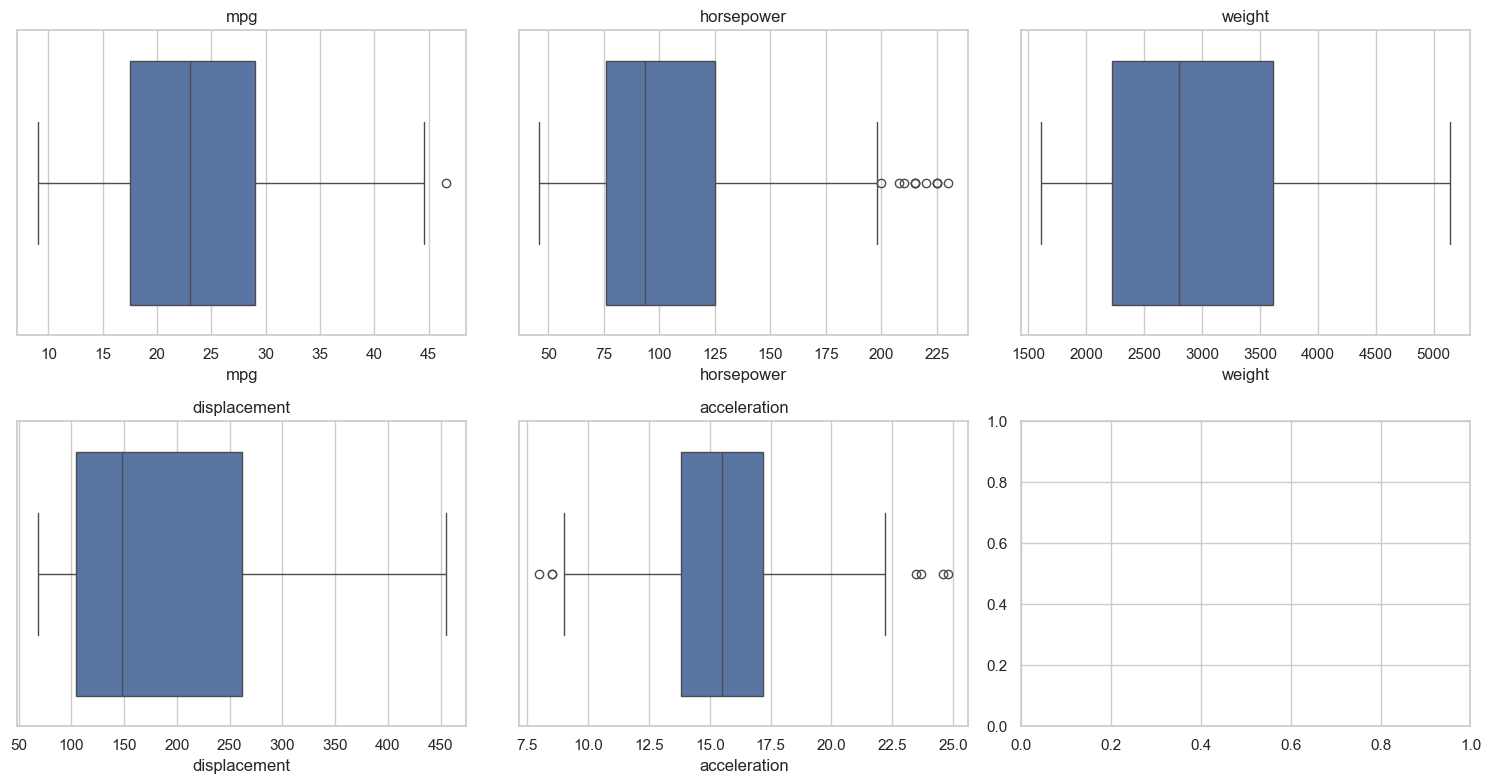

In [23]:
#Outlier visualization
cols = ["mpg", "horsepower", "weight", "displacement", "acceleration"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [24]:
#outlier removal (light cleaning)
df = df[df["mpg"] < 50]   # remove extreme mpg values
df = df[df["horsepower"] > 20]  # remove impossible horsepower

In [25]:
#Convert types
df["origin"] = df["origin"].astype("category")
df["cylinders"] = df["cylinders"].astype("category")
df["model_year"] = df["model_year"].astype("category")

In [26]:
#Feature engineering
# Horsepower to weight ratio
df["hp_to_weight"] = df["horsepower"] / df["weight"]

# Car age (dataset ends in 1982)
df["car_age"] = 82 - df["model_year"].astype(int)

# One-hot encode origin
df = pd.get_dummies(df, columns=["origin"], drop_first=True)

In [27]:
#Scaling numeric features
from sklearn.preprocessing import StandardScaler

scale_cols = ["horsepower", "weight", "displacement", "acceleration", 
              "hp_to_weight", "car_age"]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [28]:
#Final inspection
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   name          398 non-null    object  
 8   hp_to_weight  398 non-null    float64 
 9   car_age       398 non-null    float64 
 10  origin_japan  398 non-null    bool    
 11  origin_usa    398 non-null    bool    
dtypes: bool(2), category(2), float64(7), object(1)
memory usage: 27.4+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,hp_to_weight,car_age,origin_japan,origin_usa
0,18.0,8,1.090604,0.673118,0.630870,-1.295498,70,chevrolet chevelle malibu,0.369595,1.627426,False,True
1,15.0,8,1.503514,1.589958,0.854333,-1.477038,70,buick skylark 320,1.638144,1.627426,False,True
2,18.0,8,1.196232,1.197027,0.550470,-1.658577,70,plymouth satellite,1.466791,1.627426,False,True
3,16.0,8,1.061796,1.197027,0.546923,-1.295498,70,amc rebel sst,1.473177,1.627426,False,True
4,17.0,8,1.042591,0.935072,0.565841,-1.840117,70,ford torino,0.953937,1.627426,False,True


In [29]:
#Save cleaned dataset
df.to_csv("auto_mpg_cleaned.csv", index=False)
print("Saved cleaned dataset as auto_mpg_cleaned.csv")

Saved cleaned dataset as auto_mpg_cleaned.csv
